In [302]:
!pip install seaborn==0.9.0
!pip install matplotlib
!pip install numpy

In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import json

from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
%matplotlib inline

# Dataset Experiments

In [41]:
#result_path = 'results/artificial_grammar/10_12_2019_20_59_02/dataset_experiments.json'
result_path = 'results/artificial_grammar/10_13_2019_03_23_18/dataset_experiments.json'
dataset_exp_results = json.load(open(result_path))
max_lens = 0
for num_samples in dataset_exp_results:
    arr = dataset_exp_results[num_samples]
    if max_lens < len(dataset_exp_results[num_samples]):
        max_lens = len(dataset_exp_results[num_samples])
print(max_lens)
for num_samples in dataset_exp_results:
    arr = dataset_exp_results[num_samples]
    padding = [None] * (max_lens - len(arr))
    dataset_exp_results[num_samples] = np.array(dataset_exp_results[num_samples] + padding)
dataset_exp_results = pd.DataFrame(dataset_exp_results)

x = ['1000', '5000', '10000', '25000', '50000', '100000']
#dataset_exp_results[x]

160


(0, 1)

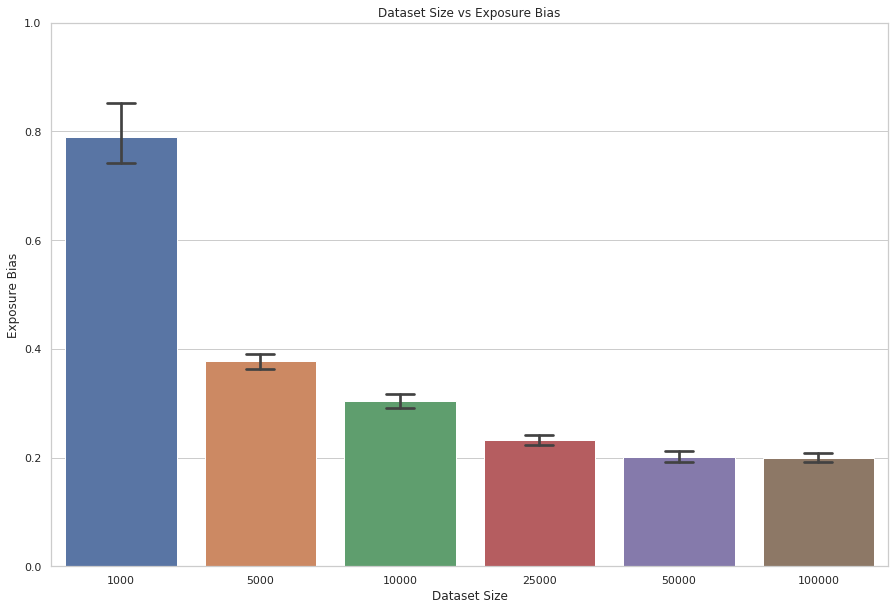

In [42]:
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(15, 10))

sns.barplot(data=dataset_exp_results[x], ax=ax1, capsize=.2)

plt.title('Dataset Size vs Exposure Bias')
ax1.set_xlabel('Dataset Size')
ax1.set_ylabel('Exposure Bias')
ax1.set_ylim(0, 1)

# Validation Experiments

In [132]:
#result_file = 'results/artificial_grammar/10_12_2019_22_07_56/validation_experiments.json'
#result_file = 'results/artificial_grammar/10_12_2019_21_00_22/validation_experiments.json'
result_file = 'results/artificial_grammar/10_13_2019_23_27_07/validation_experiments.json'
validation_exp_results = json.load(open(result_file))


for epoch in validation_exp_results:
    validation_exp_results[epoch]['exp_biases'] = np.array(validation_exp_results[epoch]['exp_biases'], dtype=float)
    validation_exp_results[epoch]['val_ppl'] = np.array(validation_exp_results[epoch]['val_ppl'], dtype=float)
    validation_exp_results[epoch]['exp_biases_mean'] = np.mean(validation_exp_results[epoch]['exp_biases'], dtype=float)
    validation_exp_results[epoch]['exp_biases_mean_std'] = np.std(validation_exp_results[epoch]['exp_biases'], dtype=float)
    validation_exp_results[epoch]['val_ppl_mean'] = np.mean(validation_exp_results[epoch]['val_ppl'], dtype=float)
    validation_exp_results[epoch]['val_ppl_std'] = np.std(validation_exp_results[epoch]['val_ppl'], dtype=float)

validation_exp_results = pd.DataFrame(validation_exp_results).T
#validation_exp_results = validation_exp_results[2:]
validation_exp_results['exp_biases_mean'] = validation_exp_results['exp_biases_mean'].astype(float)
validation_exp_results['val_ppl_mean'] = validation_exp_results['val_ppl_mean'].astype(float)
#validation_exp_results.index = [int(x) for x in validation_exp_results.index]
#validation_exp_results.index
x = [str(x) for x in range(20)]

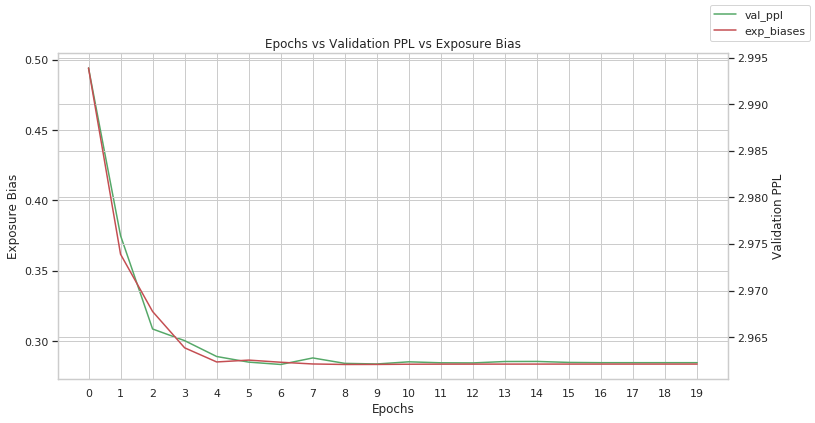

In [135]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111, label='exposure bias')

plt.title('Epochs vs Validation PPL vs Exposure Bias')
ax1.set_xlabel('Epochs')
#sns.lineplot(data=validation_exp_results[['index', 'exp_mean']], color='g')
ax1.errorbar(x=x, y=validation_exp_results.exp_biases_mean[x], color='g')
#ax1.fill_between(x, 
#                 validation_exp_results.exp_mean[x]-validation_exp_results.exp_std[x], 
#                 validation_exp_results.exp_mean[x]+validation_exp_results.exp_std[x])

#ax1.set_ylim(0.2,0.5)

ax1.set_ylabel('Exposure Bias')
ax2 = ax1.twinx()
#sns.lineplot(data=validation_exp_results, x=range(20), y='val_ppl', ax=ax2, color='b')

ax2.errorbar(x=x, y=validation_exp_results.val_ppl_mean[x], color='r')
ax2.set_ylabel('Validation PPL')
ax2.yaxis.set_label_position('right')
#ax2.set_ylim(2.8,3.2)

fig.legend(['val_ppl', 'exp_biases'])


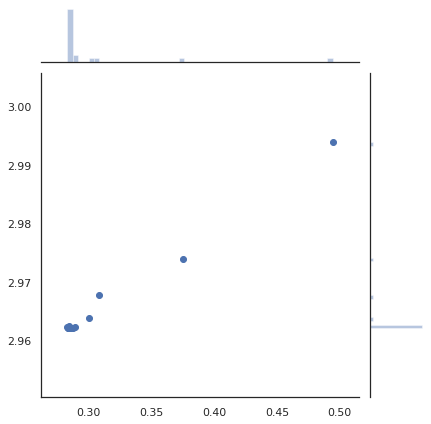

In [117]:
# for x in validation_exp_results["val_ppl"].keys():
#     validation_exp_results["val_ppl"][x] = validation_exp_results["val_ppl"][x][:10]

with sns.axes_style('white'):
    sns.jointplot(validation_exp_results["exp_biases_mean"].to_list(),
                  validation_exp_results["val_ppl_mean"].to_list(), 
                  validation_exp_results)
    


# Model Size Experiments

In [54]:
result_path = 'results/artificial_grammar/10_15_2019_16_39_43/model_size_experiments.json'
model_size_exp_results = json.load(open(result_path))
max_lens = 0
for model_size in model_size_exp_results:
    arr = model_size_exp_results[model_size]
    if max_lens < len(arr):
        max_lens = len(arr)
print(max_lens)

for model_size in model_size_exp_results:
    arr = model_size_exp_results[model_size]
    padding = [None] * (max_lens - len(arr))
    model_size_exp_results[model_size] = np.array(arr + padding)
model_size_exp_results = pd.DataFrame(model_size_exp_results)
model_size_exp_results[['xsmall', 'small', 'medium', 'large', 'xlarge']].mean()

80


xsmall    0.989718
small     0.348943
medium    0.309093
large     0.316383
xlarge    0.235201
dtype: float64

Text(0, 0.5, 'Exposure Bias')

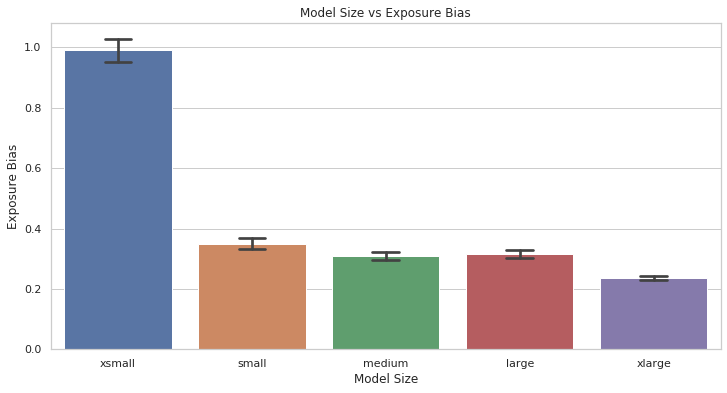

In [55]:
fig, ax4 = plt.subplots(figsize=(12, 6))
x = ['xsmall', 'small', 'medium', 'large', 'xlarge']
sns.barplot(data=model_size_exp_results[x], ax=ax4, capsize=.2)
#sns.barplot(data=model_size_exp_results[x])
plt.title('Model Size vs Exposure Bias')
ax4.set_xlabel('Model Size')
ax4.set_ylabel('Exposure Bias')


# Scheduled Sampling Experiments

In [124]:
# result_path = 'results/artificial_grammar/10_16_2019_00_31_47/scheduled_sampling_experiments.json'
#result_path = 'results/artificial_grammar/10_15_2019_16_39_32/scheduled_sampling_experiments.json'
result_path = 'results/artificial_grammar/10_16_2019_12_28_55/scheduled_sampling_experiments.json'
ss_ratio_exp_results = json.load(open(result_path))
max_lens = 0
for ss_ratio in ss_ratio_exp_results:
    arr = ss_ratio_exp_results[ss_ratio]
    if max_lens < len(arr):
        max_lens = len(arr)
print(max_lens)

for ss_ratio in ss_ratio_exp_results:
    arr = ss_ratio_exp_results[ss_ratio]
    padding = [None] * (max_lens - len(arr))
    ss_ratio_exp_results[ss_ratio] = np.array(arr + padding)
ss_ratio_exp_results = pd.DataFrame(ss_ratio_exp_results)
#ss_ratio_exp_results
#model_size_exp_results

10


Text(0, 0.5, 'Exposure Bias')

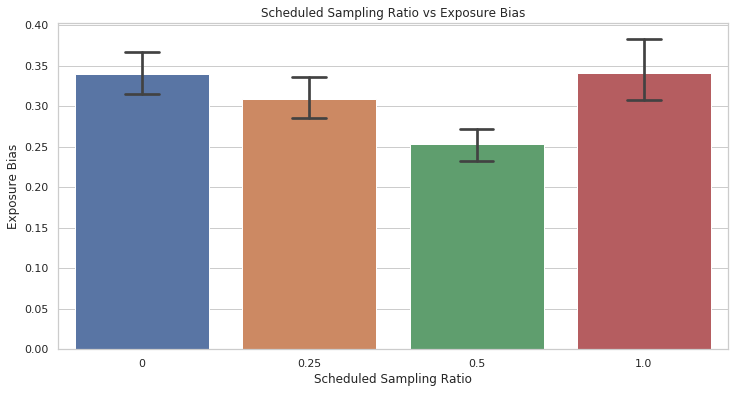

In [125]:
fig, ax4 = plt.subplots(figsize=(12, 6))
sns.barplot(data=ss_ratio_exp_results, ax=ax4, capsize=.2)
plt.title('Scheduled Sampling Ratio vs Exposure Bias')
ax4.set_xlabel('Scheduled Sampling Ratio')
ax4.set_ylabel('Exposure Bias')

# Beam Search Experiments